In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 # unformly distributed between (-3, +3)
print(X)

[[-2.56709314  0.1849618 ]
 [-0.98852502  0.3738127 ]
 [-2.6484574   2.15939554]
 ...
 [-2.00543596 -2.33300275]
 [-2.28715358  2.73733367]
 [ 0.04677432 -1.26708318]]


In [5]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
print(Y[:6])

[ 1.2593617   0.03921681  1.5328514  -1.24993303  1.67160594 -0.01791534]


y = cos(2 * x1) + cos(3 * x2)

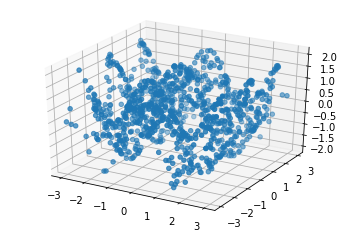

In [7]:
# Plot it on a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [8]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation="relu"),
                                    tf.keras.layers.Dense(1)
])

In [10]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
# https://keras.io/api/optimizers/adam/
model.compile(optimizer=opt, loss="mse")
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.0115
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9593
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9327
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9042
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8437
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8074
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7133
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6564
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6041
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5880
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5636
Epoch 13/100
32/32 [=================

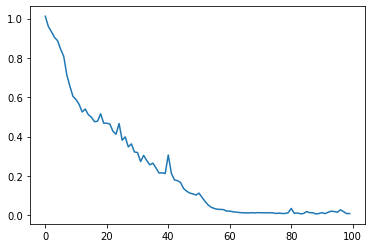

In [11]:
# Plot the loss
plt.plot(r.history["loss"], label="loss")
plt.show()

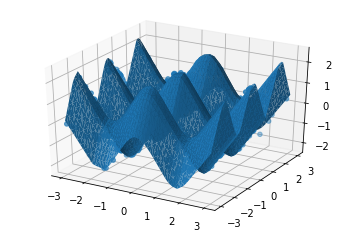

In [17]:
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

In [14]:
# Sample code for generation of first example
import numpy as np
# from matplotlib import pyplot as plt
# pyplot imported for plotting graphs

x = np.linspace(0, 10, 5)
print(x)
# numpy.linspace creates an array of
# 9 linearly placed elements between
# -4 and 4, both inclusive
y = np.linspace(20, 50, 7)
print(y)
# The meshgrid function returns
# two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x, y)

print("x_1 = ")
print(x_1)
print("y_1 = ")
print(y_1)


[ 0.   2.5  5.   7.5 10. ]
[20. 25. 30. 35. 40. 45. 50.]
x_1 = 
[[ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]
 [ 0.   2.5  5.   7.5 10. ]]
y_1 = 
[[20. 20. 20. 20. 20.]
 [25. 25. 25. 25. 25.]
 [30. 30. 30. 30. 30.]
 [35. 35. 35. 35. 35.]
 [40. 40. 40. 40. 40.]
 [45. 45. 45. 45. 45.]
 [50. 50. 50. 50. 50.]]


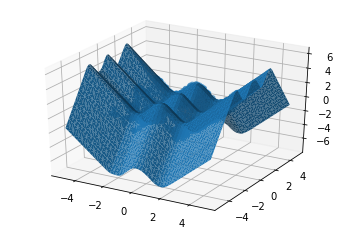

In [18]:
# Can the NN extrapolate?

# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Observation:

It doesnt quire work. It assumes that the pattern keeps going in the direction it was going at the edges, And ofcourse, this is because the NN doesnt use a periodic activation function. therefore, we dont expect it to be periodic wrt inputs.

# Happy Learning